<a href="https://colab.research.google.com/github/HowardHNguyen/Python/blob/main/Predict_and_Forecast_by_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import seed

In [2]:
seed(0)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load data on-file
data_amzn = pd.read_csv('/content/drive/MyDrive/_Python/Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter09/AMZN.csv', header=0,
                   usecols=['Date','Close'], parse_dates=True, index_col='Date')

# note: 'Date','Open','High','Low','Close','Adj Close','Volume'

In [5]:
print(data_amzn)

                  Close
Date                   
2000-11-21    24.250000
2000-11-22    25.187500
2000-11-24    28.937500
2000-11-27    28.000000
2000-11-28    25.031200
...                 ...
2018-11-15  1619.439941
2018-11-16  1593.410034
2018-11-19  1512.290039
2018-11-20  1495.459961
2018-11-21  1516.729980

[4529 rows x 1 columns]


In [6]:
print(data_amzn.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4529 entries, 2000-11-21 to 2018-11-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4529 non-null   float64
dtypes: float64(1)
memory usage: 70.8 KB
None


In [7]:
print(data_amzn.head())

              Close
Date               
2000-11-21  24.2500
2000-11-22  25.1875
2000-11-24  28.9375
2000-11-27  28.0000
2000-11-28  25.0312


In [11]:
# load the dataset directly from Yahoo Finance for Apple Stock
import yfinance as yf

# Download data for AAPL (Apple Inc.)
aapl = yf.download("AAPL", start="2010-01-01", end="2023-10-10")

# Download data for AMZN (Amazon Inc.)
amzn = yf.download("AMZN", start="2010-01-01", end="2023-10-10")

# Download data for EOLS (Evolus Inc.)
eols = yf.download("EOLS", start="2010-01-01", end="2023-10-10")

# Download data for VFS (Vinfast Inc.)
vfs = yf.download("VFS", start="2010-01-01", end="2023-10-10")

# Download data for TSLA (Tesla Inc.)
tsla = yf.download("TSLA", start="2010-01-01", end="2023-10-10")

# Print the first 5 rows of the data
print(amzn.describe())
print(aapl.describe())
print(eols.describe())
print(vfs.describe())
print(tsla.describe())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
              Open         High          Low        Close    Adj Close  \
count  3465.000000  3465.000000  3465.000000  3465.000000  3465.000000   
mean     62.082455    62.805617    61.288780    62.060183    62.060183   
std      54.313158    54.969206    53.587626    54.269285    54.269285   
min       5.296500     5.564500     5.290000     5.430500     5.430500   
25%      13.767500    13.920500    13.632000    13.779500    13.779500   
50%      39.162498    39.474499    38.895000    39.246498    39.246498   
75%      97.449997    98.652000    96.225502    97.531502    97.531502   
max     187.199997   188.654007   184.839493   186.570496   186

In [ ]:
# Print the first 5 rows of the data of apple
print(aapl.describe())

In [ ]:
# To get a preview of the data contained in it, we can calculate a series of basic statistics.
print(eols.describe())

In [ ]:
# To get a preview of the data contained in it, we can calculate a series of basic statistics.
print(vfs.describe())

In [ ]:
# To get a preview of the data contained in it, we can calculate a series of basic statistics.
print(tsla.describe())

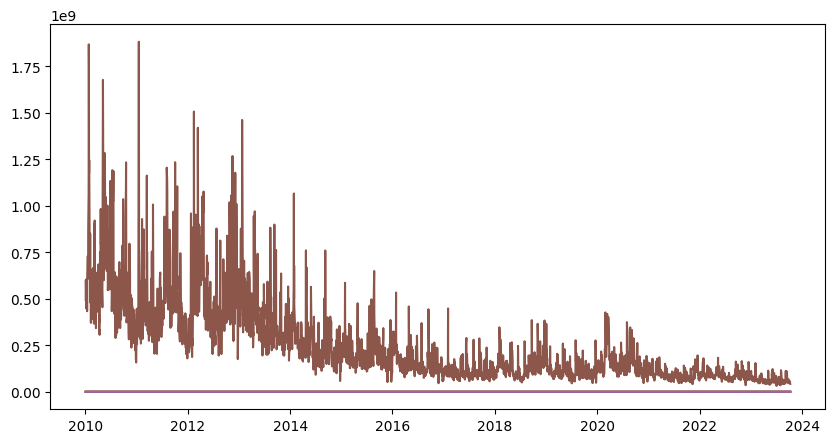

In [12]:
# perform an initial visual exploratory analysis of the time series
plt.figure(figsize=(10,5))
plt.plot(aapl)
plt.show()

# note: 1e9 = 1 x 10 to the power of 9 or = one billion (1,000,000,000)

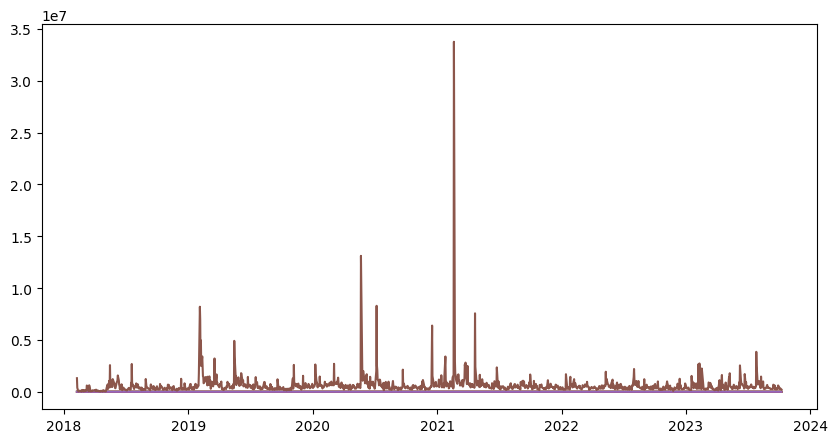

In [13]:
# perform an initial visual exploratory analysis of the time series for EOLS
plt.figure(figsize=(10,5))
plt.plot(eols)
plt.show()

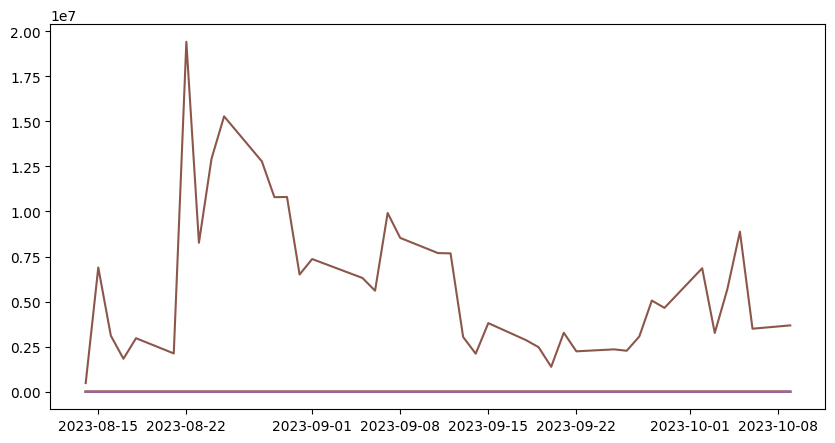

In [14]:
# perform an initial visual exploratory analysis of the time series for Vinfast
plt.figure(figsize=(10,5))
plt.plot(vfs)
plt.show()
# 1e7 = 1,000,000

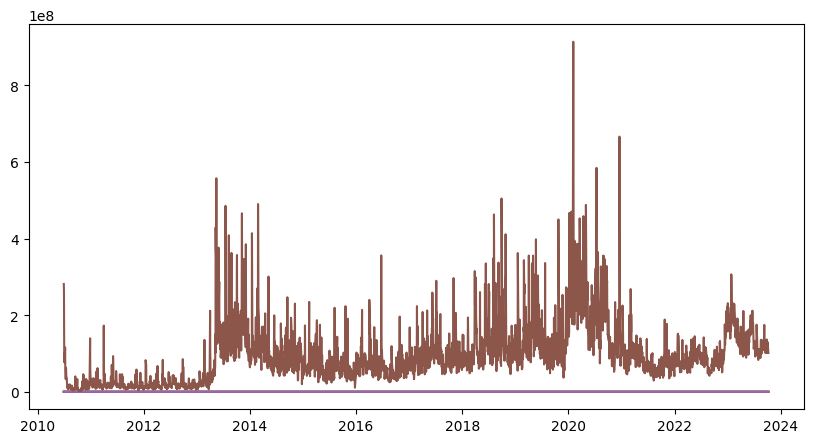

In [15]:
# perform an initial visual exploratory analysis of the time series for Tesla
plt.figure(figsize=(10,5))
plt.plot(tsla)
plt.show()
# 1e8 = 10,000,000

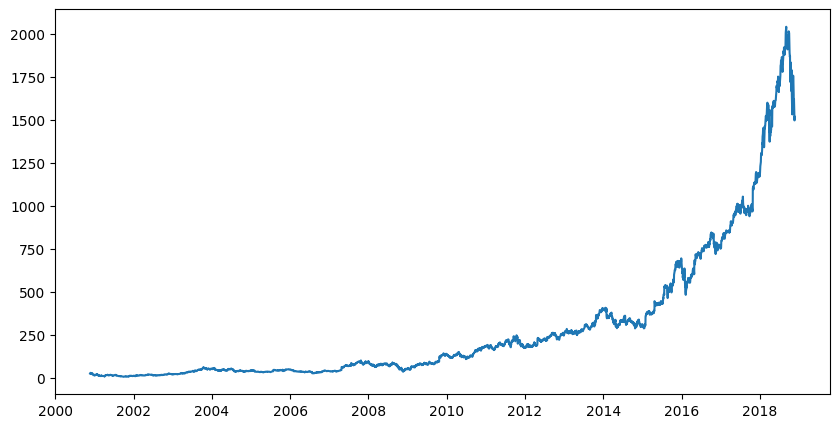

In [16]:
# perform an initial visual exploratory analysis of the time series
plt.figure(figsize=(10,5))
plt.plot(data_amzn)
plt.show()

# note: 1e9 = 1 x 10 to the power of 9 or = one billion (1,000,000,000)

In [17]:
# Now, let's try to obtain a deeper understanding of the change that Tesla stock
# has recorded over time. To calculate percentage changes in Python, we will use
# the pct_change() function. This function returns percentage changes over a
# given number of periods:
data_amznPCh = data_amzn.pct_change()

In [18]:
# to calculate the logarithm of returns, we will use the log() function from numpy:
LogReturns = np.log(1 + data_amznPCh)
print(LogReturns.tail(10))

               Close
Date                
2018-11-08 -0.000330
2018-11-09 -0.024504
2018-11-12 -0.045140
2018-11-13 -0.003476
2018-11-14 -0.019913
2018-11-15  0.012696
2018-11-16 -0.016204
2018-11-19 -0.052251
2018-11-20 -0.011191
2018-11-21  0.014123


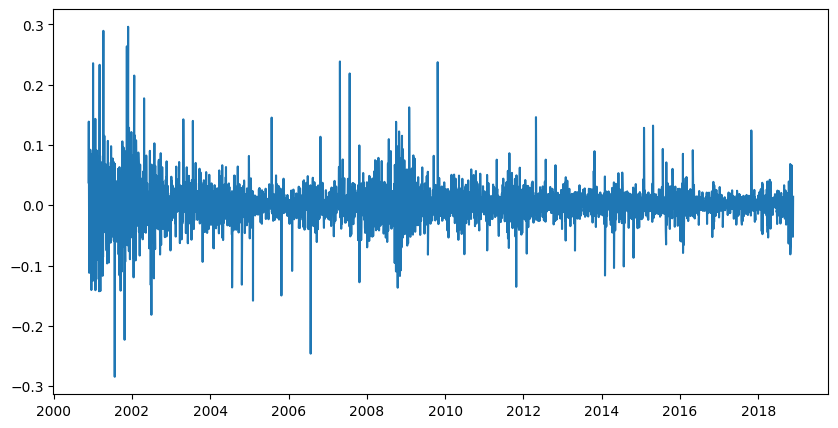

In [19]:
# Now, we will draw a diagram with the logarithm of the returns we have calculated:
plt.figure(figsize=(10,5))
plt.plot(LogReturns)
plt.show()

# **Using RNNs to predict time series data**
Long short-term memory (LSTM) is a particular architecture of recurrent neural networks (RNNs). RNNs are based on the need to preserve the memory of past events; this behavior is not possible with normal networks, and that is why RNNs are used in areas where the classic networks do not produce results, such as the prediction of time series (weather, quotations, and so on) that refer to previous data.

An LSTM network consists of cells (LSTM blocks) that are linked together. Each cell is, in turn, composed of three types of ports: the input gate, output gate, and forget gate. They implement the write, read, and reset functions on the cell memory, respectively, so the LSTM modules are able to regulate what is stored and deleted. This is possible thanks to the presence of various elements called gates, which are composed of a sigmoid neural layer and a pointwise product. The output of each gate is in the range (0, 1), representing the percentage of information that flows inside it.

**Let's get started**
It is good practice to rescale the data before training an LSTM algorithm. With rescaling, data units are eliminated, allowing you to compare data from different locations easily. In this case, we will use the min-max method (usually called feature scaling) to get all the scaled data in the range [0, 1]. To perform feature scaling, we can use the preprocessing package that's available in the sklearn library:

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
DataScaled = scaler.fit_transform(data_amzn)

Now, let's split the data for the training and test model. Training and testing the model forms the basis for further usage of the model for prediction in predictive analytics. Given a dataset of 4,529 rows of data, we split it into a convenient ratio (say 70:30) and allocate 2,325 rows for training and 997 rows for testing:

In [21]:
np.random.seed(7)

In [22]:
TrainLen = int(len(DataScaled) * 0.70)
TestLen = len(DataScaled) - TrainLen
TrainData = DataScaled[0:TrainLen, :]
TestData = DataScaled[TrainLen:len(DataScaled), :]

In [23]:
print(len(TrainData), len(TestData))

3170 1359


Now, we need input and output to train and test our network. It is clear that the input is represented by the data that's present in the dataset. Therefore, we must construct our output; we will do so by supposing we want to predict the Tesla stock price at time t + 1 with respect to the value stored at time t. A recurrent network has memory, and this is maintained by fixing the so-called time step.
The time step is all about how many steps back in time backpropagation uses
when calculating gradients for weight updates during training. In this way, we
set TimeStep=1. Then, we define a function that gives a dataset and a time step,
which then returns the input and output data:

In [24]:
def DatasetCreation(dataset, TimeStep = 1):
  DataX, DataY = [], []
  for i in range (len(dataset) - TimeStep - 1):
    a = dataset[i:(i + TimeStep), 0]
    DataX.append(a)
    DataY.append(dataset[ + TimeStep, 0])
  return np.array(DataX), np.array(DataY)

In this function, DataX = Input = data(t) is the input variable and DataY = Output = data(t+1) is the predicted value at the next time period.

Let's use this function to set the train and test datasets that we will use in the next phase (networking model):

In [25]:
TimeStep = 1
TrainX, TrainY = DatasetCreation(TrainData, TimeStep)
TestX, TestY = DatasetCreation(TestData, TimeStep)

In an LSTM/RNN network, the input for each LSTM layer must contain the
following information:

 - Observations: Number of observations collected
 - Time steps: A time step is an observation point in the sample
 - Features: One feature for each step

Therefore, it is necessary to add a temporal dimension to those foreseen for a
classical network. Thus, the input shape is as follows:
(Number of observations, number of time steps, number of features per steps)
In this way, the input for each LSTM layer becomes three-dimensional.

To transform the input datasets into 3D form, we will use the np.reshape()
function, as follows:

In [26]:
TrainX = np.reshape(TrainX, (TrainX.shape[0], 1, TrainX.shape[1]))
TestX = np.reshape(TestX, (TestX.shape[0], 1, TestX.shape[1]))

Now, that the data is in the right format, it's time to create the model.
Let's start by importing the libraries

In [27]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

We will use a Sequential model, that is, a linear stack of layers. To create a
sequential model, we have to pass a list of layer instances to the constructor. We can also simply add layers via the add() method:

In [30]:
model = Sequential()
model.add(LSTM(256, input_shape=(1, TimeStep)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(TrainX, TrainY, epochs=100, batch_size=1, verbose=1)
model.summary()

Epoch 1/100
3168/3168 [==============================] - 22s 6ms/step - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 2/100
3168/3168 [==============================] - 19s 6ms/step - loss: 1.0766e-06 - accuracy: 0.0000e+00
Epoch 3/100
3168/3168 [==============================] - 19s 6ms/step - loss: 4.0515e-07 - accuracy: 0.0000e+00
Epoch 4/100
3168/3168 [==============================] - 23s 7ms/step - loss: 1.4768e-08 - accuracy: 0.0000e+00
Epoch 5/100
3168/3168 [==============================] - 19s 6ms/step - loss: 7.2736e-13 - accuracy: 0.0000e+00
Epoch 6/100
3168/3168 [==============================] - 19s 6ms/step - loss: 1.5598e-13 - accuracy: 0.0000e+00
Epoch 7/100
3168/3168 [==============================] - 21s 7ms/step - loss: 2.7021e-13 - accuracy: 0.0000e+00
Epoch 8/100
3168/3168 [==============================] - 21s 7ms/step - loss: 3.3156e-13 - accuracy: 0.0000e+00
Epoch 9/100
3168/3168 [==============================] - 19s 6ms/step - loss: 3.8051e-13 - accuracy: 0.0000e

In [31]:
score = model.evaluate(TrainX, TrainY, verbose=0)
print('Keras Model Loss = ', score[0])
print('Keras Model Accuracy = ', score[1])

Keras Model Loss =  7.609229679727061e-14
Keras Model Accuracy =  0.0


The model is now ready for use. We can therefore use it to execute our predictions:

In [32]:
TrainPred = model.predict(TrainX)
TestPred = model.predict(TestX)

43/43 [==============================] - 1s 4ms/step


The predictions must be reported in their original form so that they can be
compared to the actual values:

In [33]:
TrainPred = scaler.inverse_transform(TrainPred)
TrainY = scaler.inverse_transform([TrainY])

In [34]:
TestPred = scaler.inverse_transform(TestPred)
TestY = scaler.inverse_transform([TestY])

To verify the correct prediction of data, we can now visualize the results by
drawing an appropriate graph. To display the time series correctly, a prediction
shift is required. This operation must be carried out both on the train set and the test set:

In [35]:
TrainPredictPlot = np.empty_like(DataScaled)
TrainPredictPlot[:, :] = np.nan
TrainPredictPlot[1:len(TrainPred)+1, :] = TrainPred

As we stated previously, the same operation must then be performed on the test set:

In [36]:
TestPredictPlot = np.empty_like(DataScaled)
TestPredictPlot[:, :] = np.nan
TestPredictPlot[len(TrainPred)+(1*2)+1:len(DataScaled)-1, :] = TestPred

Finally, we have to plot the actual data and the predictions:

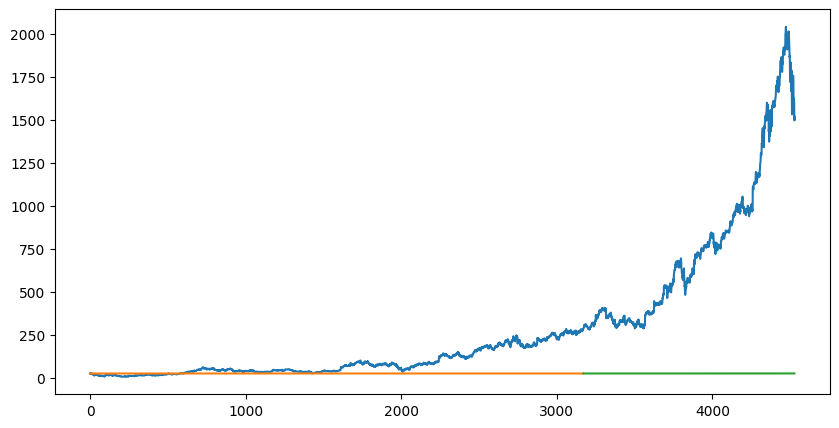

In [37]:
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(DataScaled))
plt.plot(TrainPredictPlot)
plt.plot(TestPredictPlot)
plt.show()